In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('Classified Data',index_col=0)

In [90]:
data.head(1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1


# These features are very close in number so we need to make a transformation on it.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(data.drop('TARGET CLASS',axis=1))
feature = scaler.transform(data.drop('TARGET CLASS',axis=1))

## Creating a dataframe from newly scaled or transformed features

In [19]:
data_feat=pd.DataFrame(feature,columns=data.columns[:-1])

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_feat,data['TARGET CLASS'],test_size=0.3, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=40)
model.fit(X_train,y_train)

In [92]:
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.96

In [93]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


array([[154,   5],
       [  7, 134]])

In [102]:
print ("Confusion Matrix \n",confusion_matrix(y_test,y_predict))
print ('\n')
print (classification_report(y_test,y_predict))

Confusion Matrix 
 [[154   5]
 [  7 134]]


             precision    recall  f1-score   support

          0       0.96      0.97      0.96       159
          1       0.96      0.95      0.96       141

avg / total       0.96      0.96      0.96       300



# Now to test which K value works better

In [73]:
accuracy_=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    accuracy_.append(model.score(X_test,y_test))
    

Text(0.5,1,'Accuracy VS K Value')

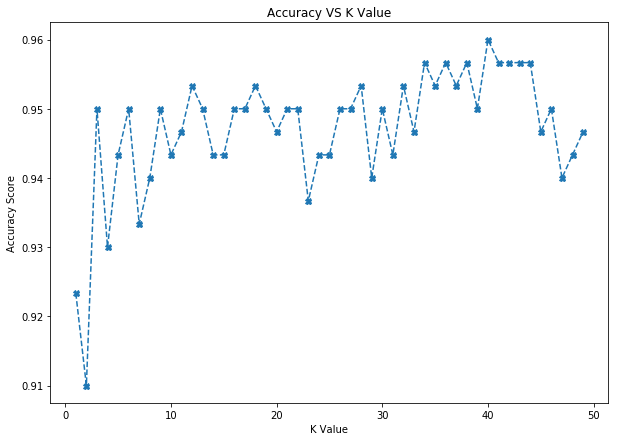

In [98]:
plt.figure(figsize=(10,7))
plt.plot(range(1,50),accuracy_,ls='--',marker='X')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy VS K Value')